In [1]:
library(readxl)
library(dplyr)
library(scales)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'scales' was built under R version 3.6.3"

In [2]:
options(warn=-1)
Diamante <- read_excel("C:/Users/Sabrina/Downloads/Exploracion_d_multivariados/diamante_nuevo.xlsx", sheet = 1)

# distribución de estudiantes por nivel

In [3]:
Diamante_nivel <- filter (Diamante, Nivel == "2" | Nivel == "3" )

In [4]:
Diamante_nivel_sin3 <- subset(Diamante_nivel, Modalidad!="Secundaria") 

In [5]:
table(Diamante_nivel_sin3$Nivel)


    2 
82035 

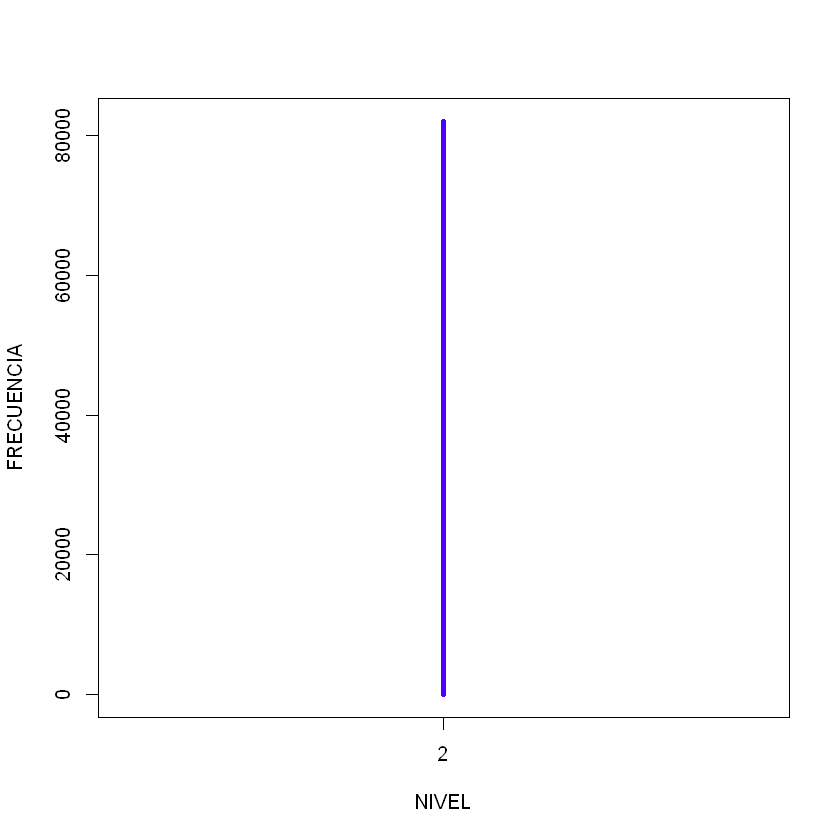

In [6]:
plot(table(Diamante_nivel_sin3$Nivel),
     xlab=("NIVEL"),
     ylab=("FRECUENCIA"),
     type="h",
     lty="solid",
     lwd=4,
     col=topo.colors(5))

# distribución por turno

In [7]:
Diamante_t_completo <- filter (Diamante, turno == "COMPLETO" )
Diamante_t_diurno <- filter (Diamante,turno == "DIURNO" )
Diamante_t_mañana <- filter (Diamante,turno == "MAÑANA" )
Diamante_t_rotativo <- filter (Diamante,turno == "ROTATIVO")
Diamante_t_tarde <- filter (Diamante,turno == "TARDE" )

In [8]:
t_completo  <-  length(unique(Diamante_t_completo$Documento))
t_diurno  <-  length(unique(Diamante_t_diurno$Documento))
t_mañana  <-  length(unique(Diamante_t_mañana$Documento))
t_rotativo  <-  length(unique(Diamante_t_rotativo$Documento))
t_tarde  <-  length(unique(Diamante_t_tarde$Documento))

In [9]:
turno <- c("Completo", "Diurno", "Mañana", "Rotativo", "Tarde")
cantidad <- c(t_completo, t_diurno, t_mañana, t_rotativo, t_tarde)                

In [10]:
alumnospturno <- data.frame ("Turno" = turno, "Cantidad" = cantidad)

alumnospturno$Turno <- as.factor (alumnospturno$Turno)

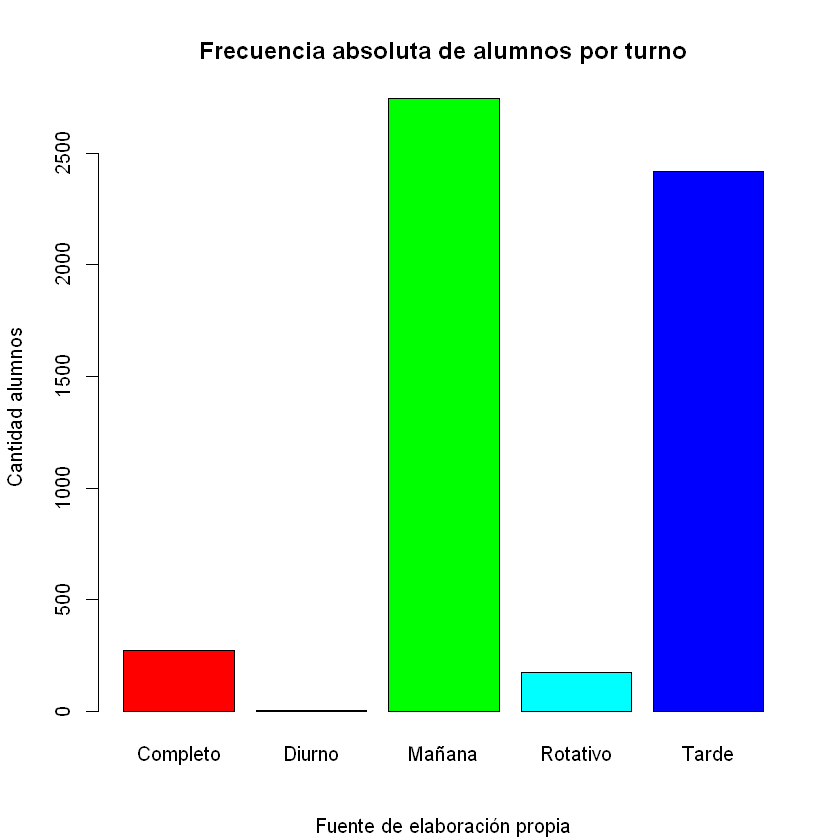

In [11]:
barplot (alumnospturno$Cantidad,
         names = alumnospturno$Turno,
         main = "Frecuencia absoluta de alumnos por turno",
         col = rainbow(6),
         ylab = "Cantidad alumnos",
         sub = "Fuente de elaboración propia")

# distribución por sector público y privado

In [12]:
Diamante_sector_priv<- filter (Diamante, EsPrivada == "S" )
Diamante_sector_pub<- filter (Diamante, EsPrivada == "N" )

In [13]:
alumnospgest <- data.frame("Gestion" = c("Pública", "Privada"),
                           "Cantidad" = c(length(unique(Diamante_sector_pub$Documento)),length(unique(Diamante_sector_priv$Documento))))

In [14]:
alumnospgest$Gestion <- as.factor(alumnospgest$Gestion)

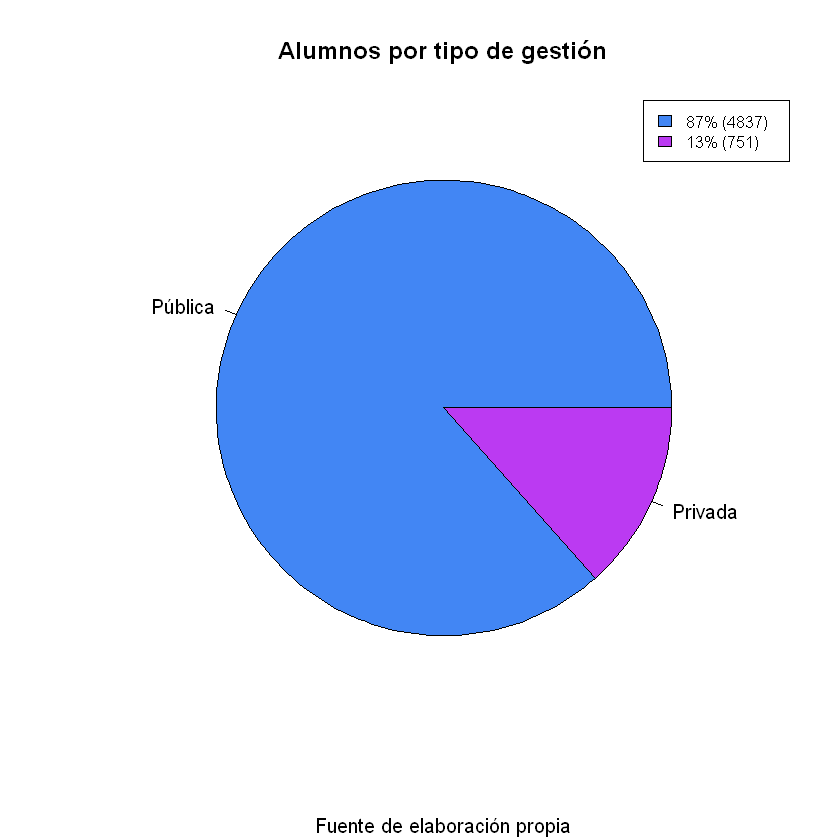

In [15]:
colors = c('#4286f4','#bb3af2')
pie(alumnospgest$Cantidad, labels = alumnospgest$Gestion, main = "Alumnos por tipo de gestión",
    col = colors,
   sub = "Fuente de elaboración propia")

# Agregar los porcentajes
porcentajes <- paste0(percent(alumnospgest$Cantidad/sum(alumnospgest$Cantidad)), " (", alumnospgest$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.8, fill = colors)

# distribución por cantidad de estudiantes por año de  cursado

In [19]:
Diamante_alumnos_acursado1 <- filter(Diamante, Año_cursado== "PRIMERO") 
Diamante_alumnos_acursado2 <- filter(Diamante, Año_cursado== "SEGUNDO")
Diamante_alumnos_acursado3 <- filter(Diamante, Año_cursado== "TERCERO")
Diamante_alumnos_acursado4 <- filter(Diamante, Año_cursado== "CUARTO")
Diamante_alumnos_acursado5 <- filter(Diamante, Año_cursado== "QUINTO")
Diamante_alumnos_acursado6 <- filter(Diamante, Año_cursado== "SEXTO")

In [20]:
acursado1  <-  length(unique(Diamante_alumnos_acursado1$Documento))
acursado2  <-  length(unique(Diamante_alumnos_acursado2$Documento))
acursado3  <-  length(unique(Diamante_alumnos_acursado3$Documento))
acursado4  <-  length(unique(Diamante_alumnos_acursado4$Documento))
acursado5  <-  length(unique(Diamante_alumnos_acursado5$Documento))
acursado6  <-  length(unique(Diamante_alumnos_acursado6$Documento))

In [21]:
año_cursado <- c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO")
cantidad <- c(acursado1, acursado2, acursado3, acursado4, acursado5, acursado6)  

In [22]:
alumnosp_acursado <- data.frame ("Año" = año_cursado, "Cantidad" = cantidad)

In [23]:
alumnosp_acursado$Año <- as.factor (alumnosp_acursado$Año)

In [24]:
alumnosp_acursado

Año,Cantidad
PRIMERO,1256
SEGUNDO,922
TERCERO,889
CUARTO,888
QUINTO,807
SEXTO,835



 CUARTO PRIMERO  QUINTO SEGUNDO   SEXTO TERCERO 
     17      17      17      17      17      17 

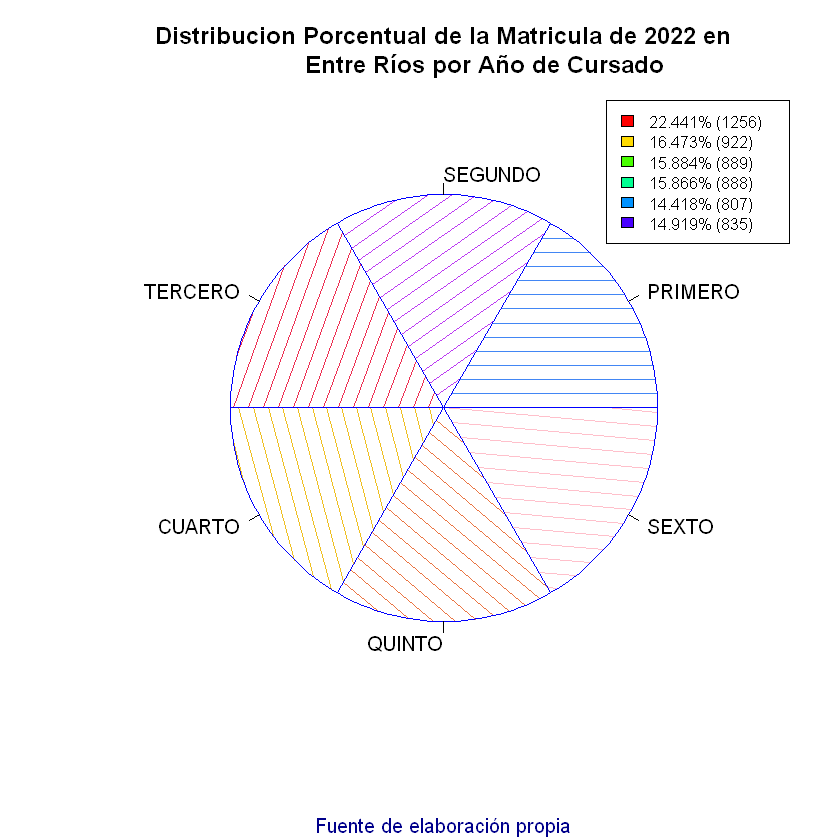

In [25]:
pie_commute <- round(100 * table(alumnosp_acursado$Año) / length(alumnosp_acursado$Año))
pie_commute

colors = c('#4286f4','#bb3af2','#ed2f52','#efc023','#ea7441','pink')

pie(pie_commute,
    labels = alumnosp_acursado$Año,
    col = colors, 
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2022 en
            Entre Ríos por Año de Cursado",
    col.main = "black",
    sub = "Fuente de elaboración propia",
    col.sub = "blue4",
    density = 9, angle = seq(0,180,35),
    border = 'blue')   

porcentajes <- paste0(percent(alumnosp_acursado$Cantidad/sum(alumnosp_acursado$Cantidad)), " (", alumnosp_acursado$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.8, fill = rainbow(7))

# segmentando por nivel,  año, y materia, tomando como punto de partida la variable cuantitativa promedio

In [26]:
PrimerT <- filter(Diamante, periodoEvaluatorio=="Primer Trimestre")
PrimerT <- rename(PrimerT, NotasPrimerT=nota)

SegundoT <- filter(Diamante, periodoEvaluatorio=="Segundo Trimestre")
SegundoT <- rename(SegundoT, NotasSegundoT=nota)

In [27]:
dataset_merge_trimestres <- merge(x = PrimerT, y = SegundoT, by = c("Documento", "asignatura"))

In [28]:
TercerT <- filter(Diamante, periodoEvaluatorio=="Tercer Trimestre")
TercerT <- rename(TercerT, NotasTercerT=nota)

In [29]:
dataset_merge_trimestres <- merge(x = dataset_merge_trimestres, y = TercerT, by = c("Documento", "asignatura"))

In [30]:
Notas_Diamante <- select(dataset_merge_trimestres, 'CUE', 'Documento', 'localidad', 'Curso', 'turno', 'curso', 'periodoEvaluatorio', 'asignatura', 'NivelEnsenanza', 'Nivel', 'Modalidad', 'año', 'EsPrivada', 'orden', 'Año_cursado','NotasPrimerT','NotasSegundoT', 'NotasTercerT')

In [31]:
Notas_Diamante_Promedio <- mutate(Notas_Diamante, Promedio = (NotasPrimerT+NotasSegundoT+NotasTercerT)/3)

# boxplot matemática 1° grado

In [32]:
Diamante_Mat_1 <- filter(Notas_Diamante_Promedio, Año_cursado== "PRIMERO" & asignatura=="MATEMÁTICA")

In [33]:
Notas_Matematica_filtrar <- filter(Diamante_Mat_1, asignatura=="MATEMÁTICA")

In [34]:
Notas_Matematica_filtrar[!is.na(Notas_Matematica_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

Promedio,frequency,acumulado
"(6,6.8]",150,150
"(6.8,7.6]",161,311
"(7.6,8.4]",349,660
"(8.4,9.2]",230,890
"(9.2,10]",121,1011


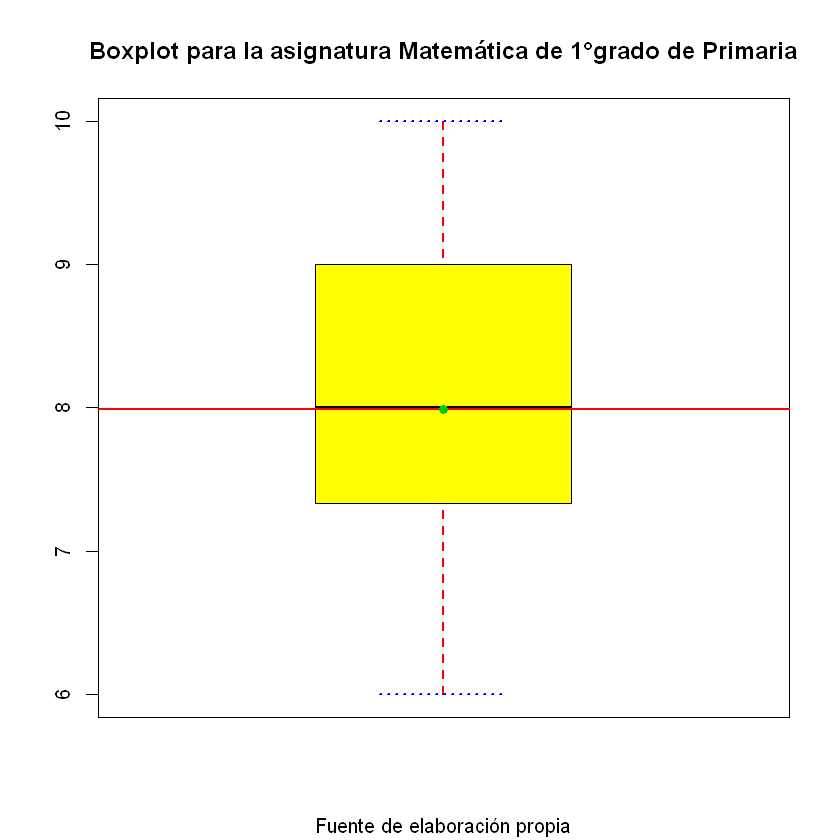

In [35]:
boxplot(Notas_Matematica_filtrar[!is.na(Notas_Matematica_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 1°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_Matematica_filtrar[!is.na(Notas_Matematica_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_Matematica_filtrar[!is.na(Notas_Matematica_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# boxplot lengua 1° grado

In [36]:
Diamante_leng_1 <- filter(Notas_Diamante_Promedio, Año_cursado== "PRIMERO" & asignatura=="LENGUA")

In [37]:
Notas_Lengua_filtrar <- filter(Diamante_leng_1, asignatura=="LENGUA")

In [38]:
Notas_Lengua_filtrar[!is.na(Notas_Lengua_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

Promedio,frequency,acumulado
"(6,6.8]",175,175
"(6.8,7.6]",166,341
"(7.6,8.4]",348,689
"(8.4,9.2]",202,891
"(9.2,10]",113,1004


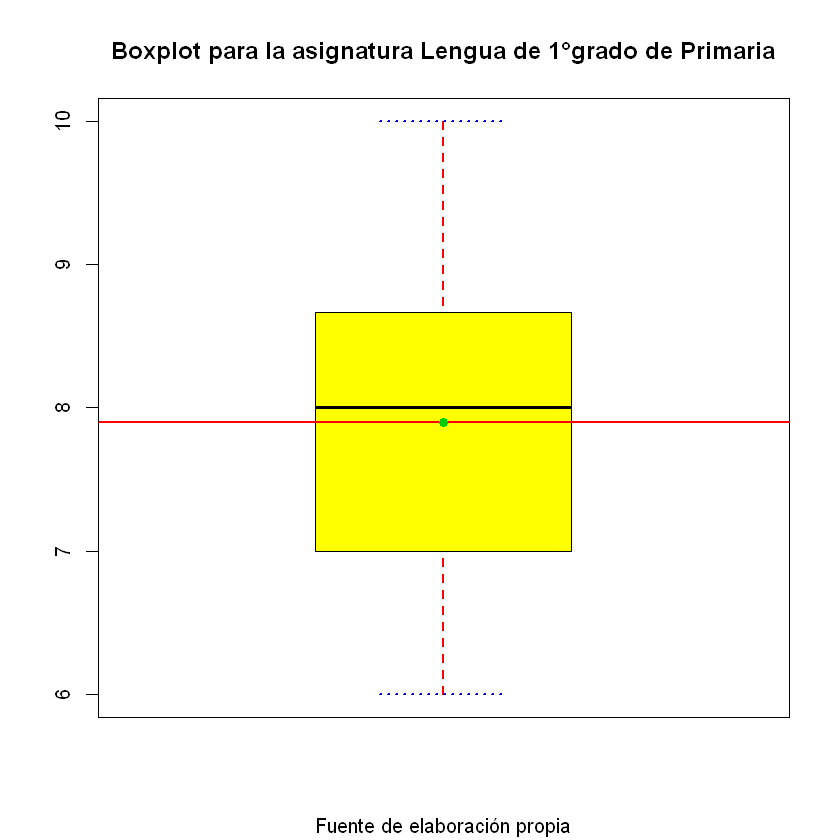

In [39]:
boxplot(Notas_Lengua_filtrar[!is.na(Notas_Lengua_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 1°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_Lengua_filtrar[!is.na(Notas_Lengua_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_Lengua_filtrar[!is.na(Notas_Lengua_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# histograma matemática 1° grado

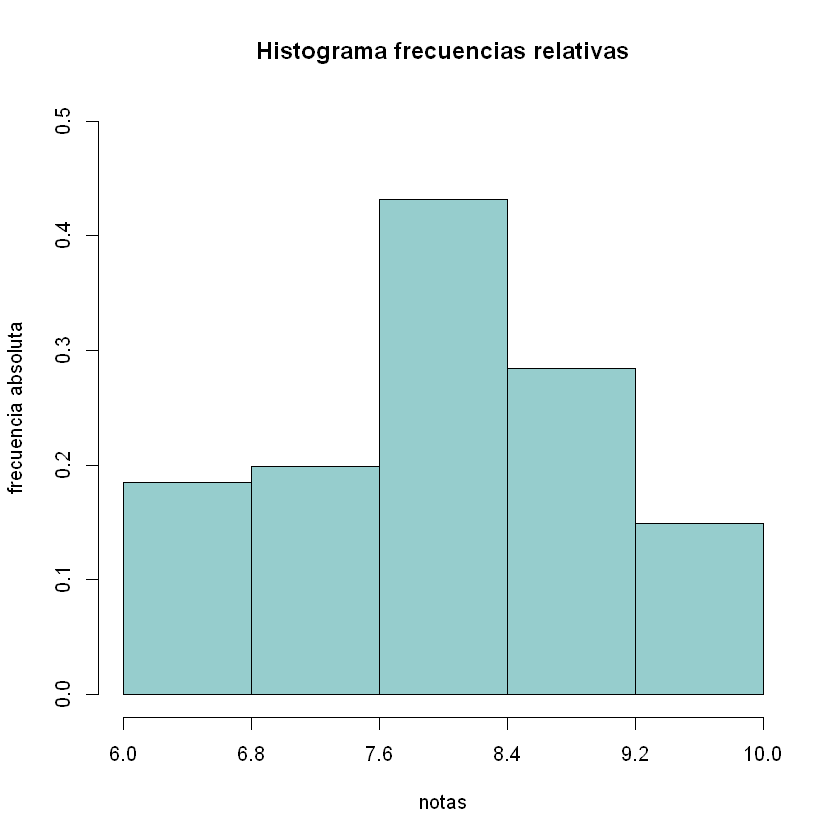

In [40]:
hist(x = Notas_Matematica_filtrar$Promedio,
     probability = TRUE, 
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# histograma lengua 1° grado

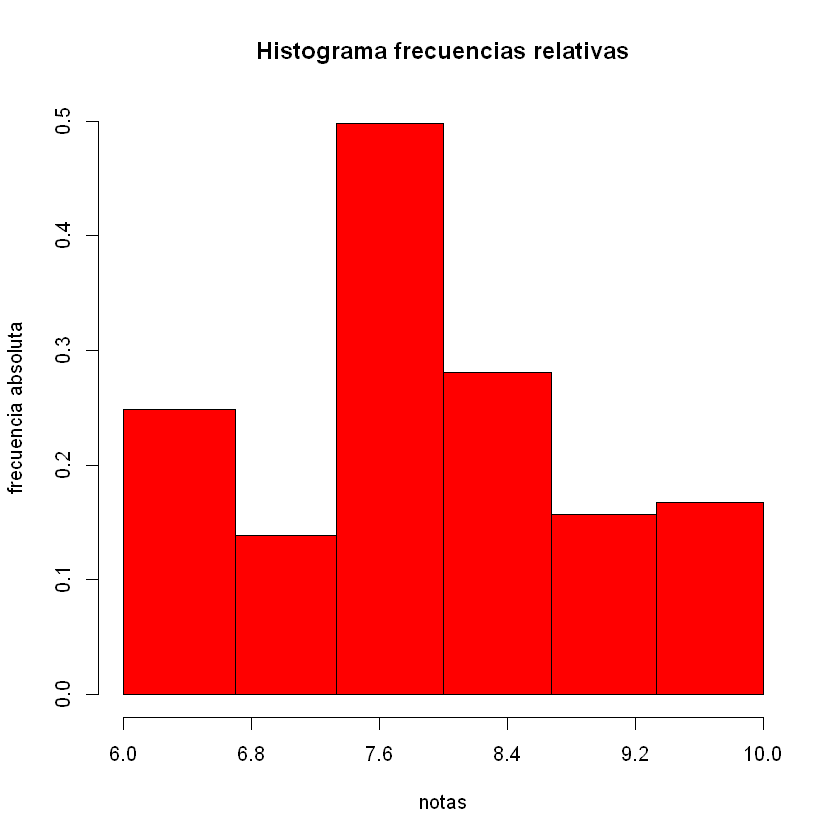

In [41]:
hist(x = Notas_Lengua_filtrar$Promedio,
     probability = TRUE, 
     col="red",
     breaks = c(6, 6.7, 7.33, 8, 8.67, 9.33, 10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# ANALISIS PARA OTROS AÑOS DE MATEMÁTICA Y LENGUA

# BOXPLOT

# Segundo

Promedio,frequency,acumulado
"(6,6.8]",99,99
"(6.8,7.6]",113,212
"(7.6,8.4]",219,431
"(8.4,9.2]",157,588
"(9.2,10]",159,747


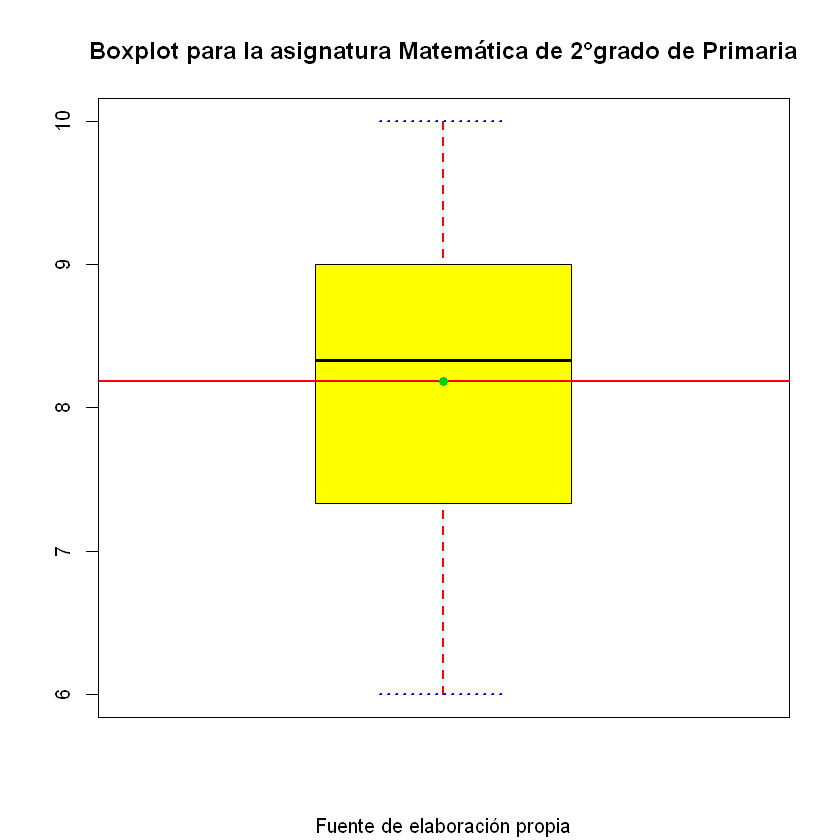

In [42]:
Diamante_mat_2 <- filter(Notas_Diamante_Promedio, Año_cursado== "SEGUNDO" & asignatura=="MATEMÁTICA")

Notas_mat2_filtrar <- filter(Diamante_mat_2, asignatura=="MATEMÁTICA")

Notas_mat2_filtrar[!is.na(Notas_mat2_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_mat2_filtrar[!is.na(Notas_mat2_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 2°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_mat2_filtrar[!is.na(Notas_mat2_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_mat2_filtrar[!is.na(Notas_mat2_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# ---------------------------------------------------------------------------------------------------------------

Promedio,frequency,acumulado
"(6,6.8]",121,121
"(6.8,7.6]",93,214
"(7.6,8.4]",192,406
"(8.4,9.2]",138,544
"(9.2,10]",150,694


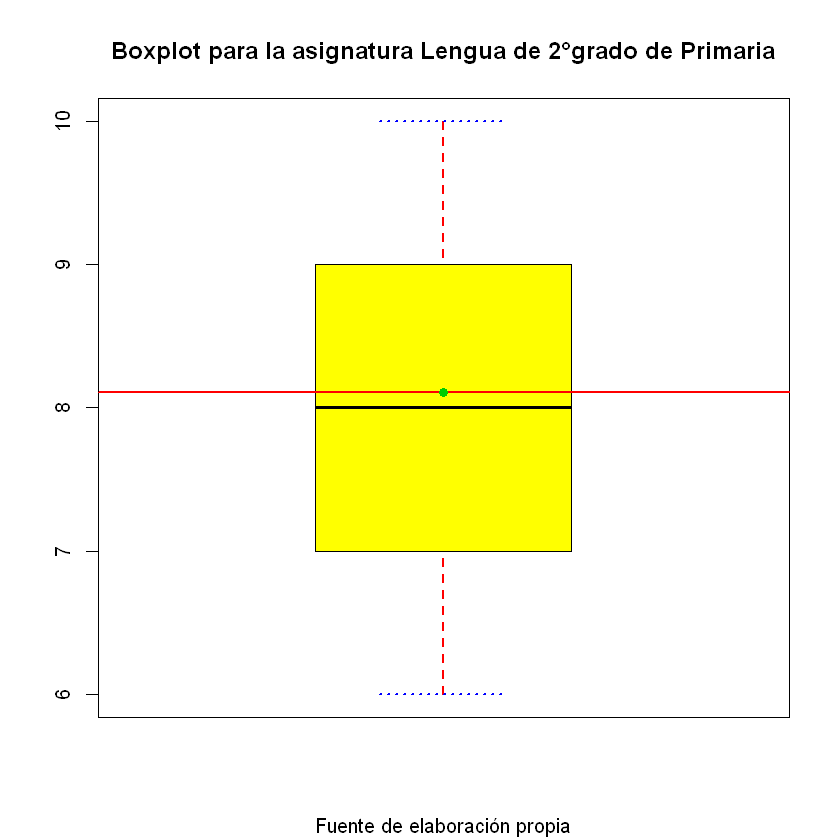

In [43]:
Diamante_len_2 <- filter(Notas_Diamante_Promedio, Año_cursado== "SEGUNDO" & asignatura=="LENGUA")

Notas_len2_filtrar <- filter(Diamante_len_2, asignatura=="LENGUA")

Notas_len2_filtrar[!is.na(Notas_len2_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_len2_filtrar[!is.na(Notas_len2_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 2°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_len2_filtrar[!is.na(Notas_len2_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_len2_filtrar[!is.na(Notas_len2_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# Tercero

Promedio,frequency,acumulado
"(6,6.8]",112,112
"(6.8,7.6]",134,246
"(7.6,8.4]",238,484
"(8.4,9.2]",139,623
"(9.2,10]",86,709


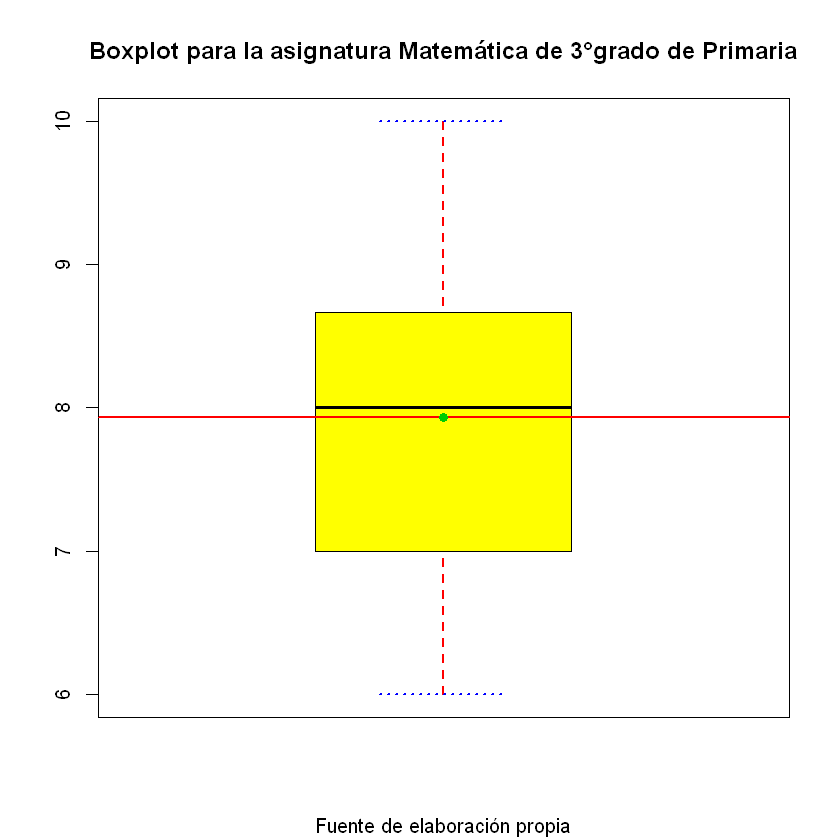

In [52]:
Diamante_mat_3 <- filter(Notas_Diamante_Promedio, Año_cursado== "TERCERO" & asignatura=="MATEMÁTICA")

Notas_mat3_filtrar <- filter(Diamante_mat_3, asignatura=="MATEMÁTICA")

Notas_mat3_filtrar[!is.na(Notas_mat3_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_mat3_filtrar[!is.na(Notas_mat3_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 3°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_mat3_filtrar[!is.na(Notas_mat3_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_mat3_filtrar[!is.na(Notas_mat3_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# ---------------------------------------------------------------------------------------------------------

Promedio,frequency,acumulado
"(6,6.8]",110,110
"(6.8,7.6]",145,255
"(7.6,8.4]",223,478
"(8.4,9.2]",113,591
"(9.2,10]",86,677


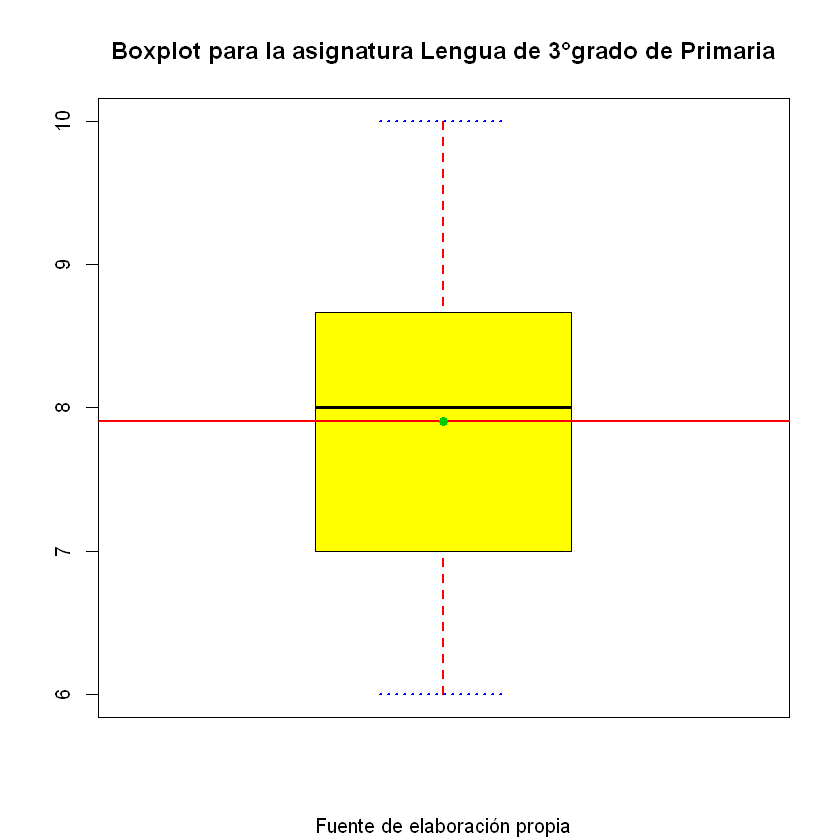

In [53]:
Diamante_len_3 <- filter(Notas_Diamante_Promedio, Año_cursado== "TERCERO" & asignatura=="LENGUA")

Notas_len3_filtrar <- filter(Diamante_len_3, asignatura=="LENGUA")

Notas_len3_filtrar[!is.na(Notas_len3_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_len3_filtrar[!is.na(Notas_len3_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 3°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_len3_filtrar[!is.na(Notas_len3_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_len3_filtrar[!is.na(Notas_len3_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# Cuarto

Promedio,frequency,acumulado
"(6,6.8]",119,119
"(6.8,7.6]",153,272
"(7.6,8.4]",198,470
"(8.4,9.2]",149,619
"(9.2,10]",106,725


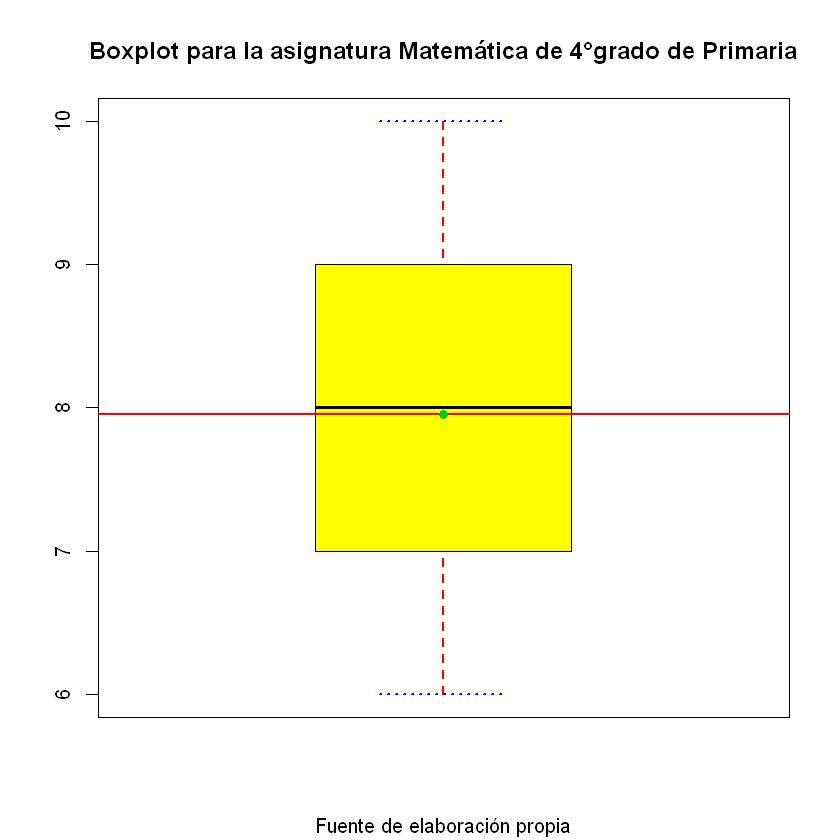

In [54]:
Diamante_mat_4 <- filter(Notas_Diamante_Promedio, Año_cursado== "CUARTO" & asignatura=="MATEMÁTICA")

Notas_mat4_filtrar <- filter(Diamante_mat_4, asignatura=="MATEMÁTICA")

Notas_mat4_filtrar[!is.na(Notas_mat4_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_mat4_filtrar[!is.na(Notas_mat4_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 4°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_mat4_filtrar[!is.na(Notas_mat4_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_mat4_filtrar[!is.na(Notas_mat4_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# ---------------------------------------------------------------------------------------------------------------

Promedio,frequency,acumulado
"(6,6.8]",134,134
"(6.8,7.6]",145,279
"(7.6,8.4]",211,490
"(8.4,9.2]",149,639
"(9.2,10]",84,723


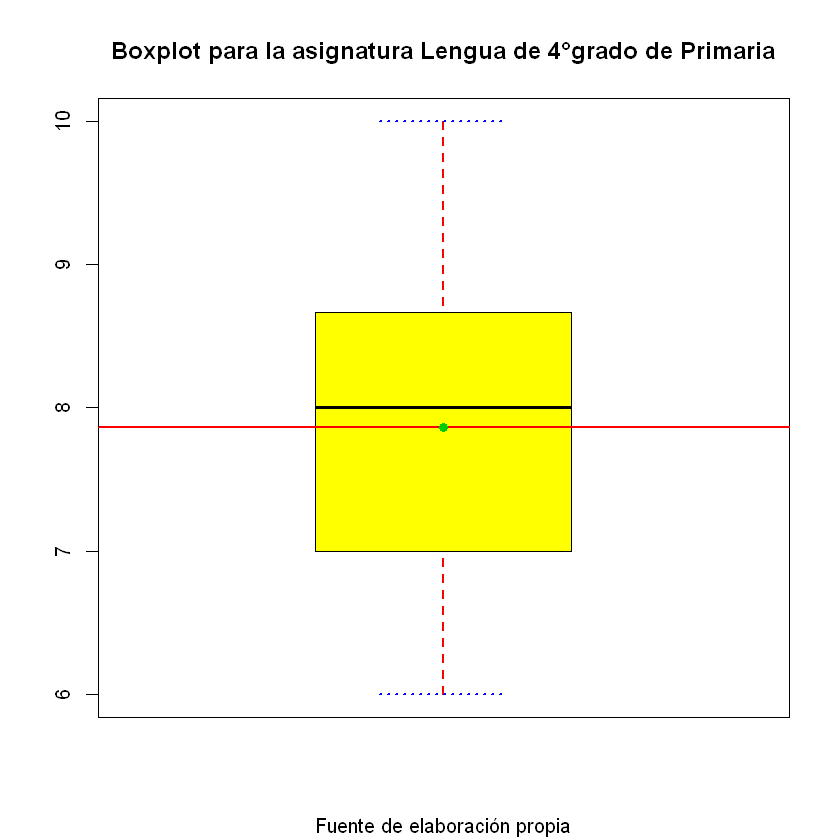

In [55]:
Diamante_len_4 <- filter(Notas_Diamante_Promedio, Año_cursado== "CUARTO" & asignatura=="LENGUA")

Notas_len4_filtrar <- filter(Diamante_len_4, asignatura=="LENGUA")

Notas_len4_filtrar[!is.na(Notas_len4_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_len4_filtrar[!is.na(Notas_len4_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 4°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_len4_filtrar[!is.na(Notas_len4_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_len4_filtrar[!is.na(Notas_len4_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# Quinto

Promedio,frequency,acumulado
"(6,6.8]",123,123
"(6.8,7.6]",116,239
"(7.6,8.4]",181,420
"(8.4,9.2]",111,531
"(9.2,10]",121,652


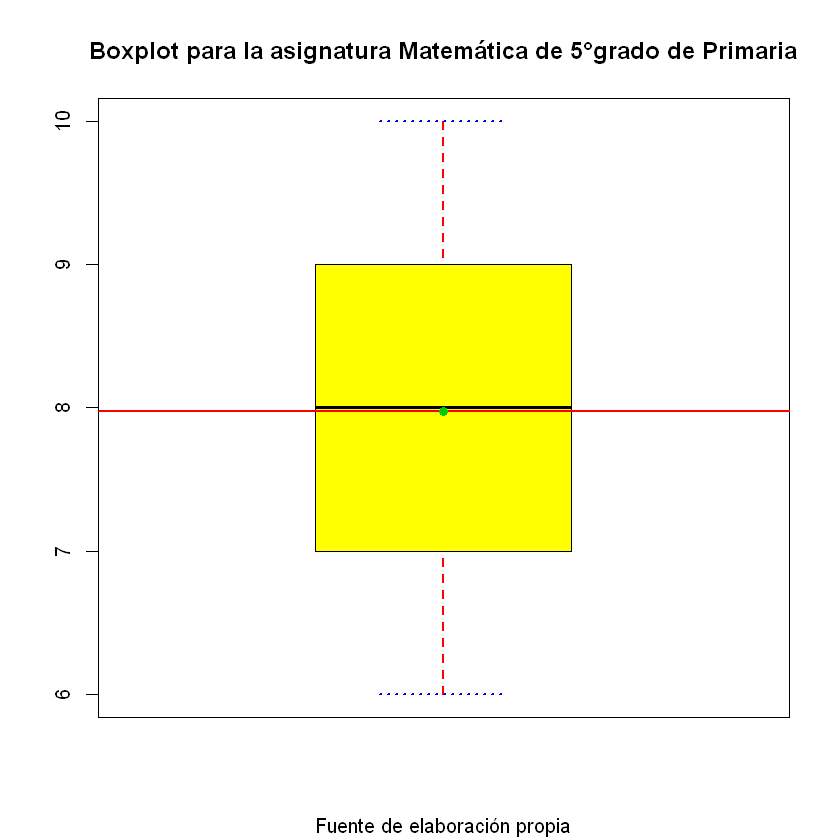

In [56]:
Diamante_mat_5 <- filter(Notas_Diamante_Promedio, Año_cursado== "QUINTO" & asignatura=="MATEMÁTICA")

Notas_mat5_filtrar <- filter(Diamante_mat_5, asignatura=="MATEMÁTICA")

Notas_mat5_filtrar[!is.na(Notas_mat5_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_mat5_filtrar[!is.na(Notas_mat5_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 5°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_mat5_filtrar[!is.na(Notas_mat5_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_mat5_filtrar[!is.na(Notas_mat5_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# --------------------------------------------------------------------------------------------------------------

Promedio,frequency,acumulado
"(6,6.8]",131,131
"(6.8,7.6]",114,245
"(7.6,8.4]",196,441
"(8.4,9.2]",123,564
"(9.2,10]",108,672


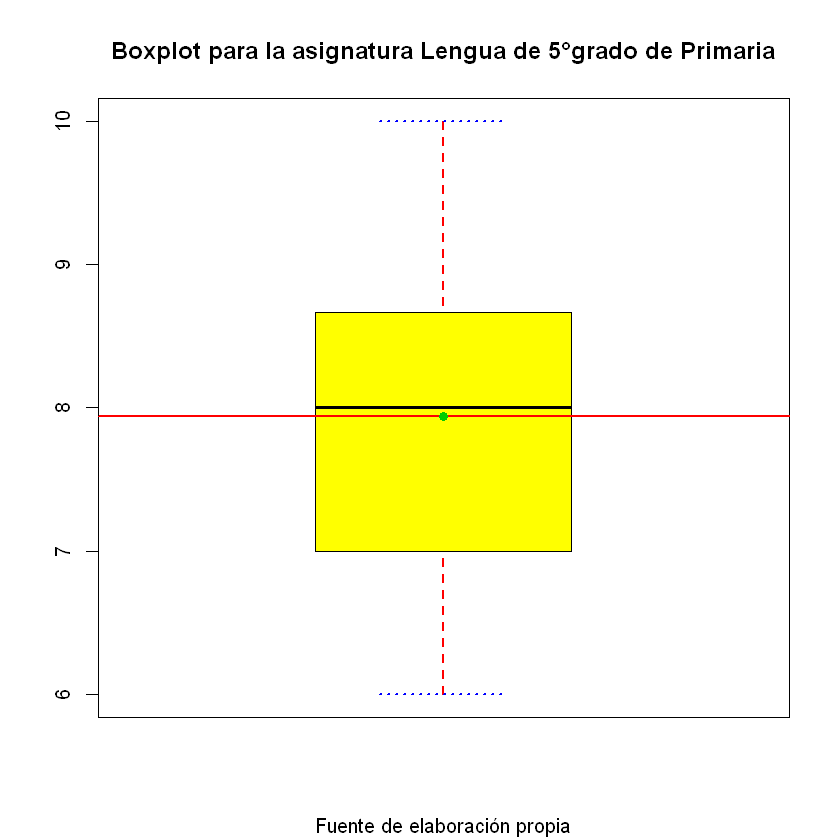

In [57]:
Diamante_len_5 <- filter(Notas_Diamante_Promedio, Año_cursado== "QUINTO" & asignatura=="LENGUA")

Notas_len5_filtrar <- filter(Diamante_len_5, asignatura=="LENGUA")

Notas_len5_filtrar[!is.na(Notas_len5_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_len5_filtrar[!is.na(Notas_len5_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 5°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_len5_filtrar[!is.na(Notas_len5_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_len5_filtrar[!is.na(Notas_len5_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# Sexto

Promedio,frequency,acumulado
"(6,6.8]",137,137
"(6.8,7.6]",115,252
"(7.6,8.4]",196,448
"(8.4,9.2]",134,582
"(9.2,10]",115,697


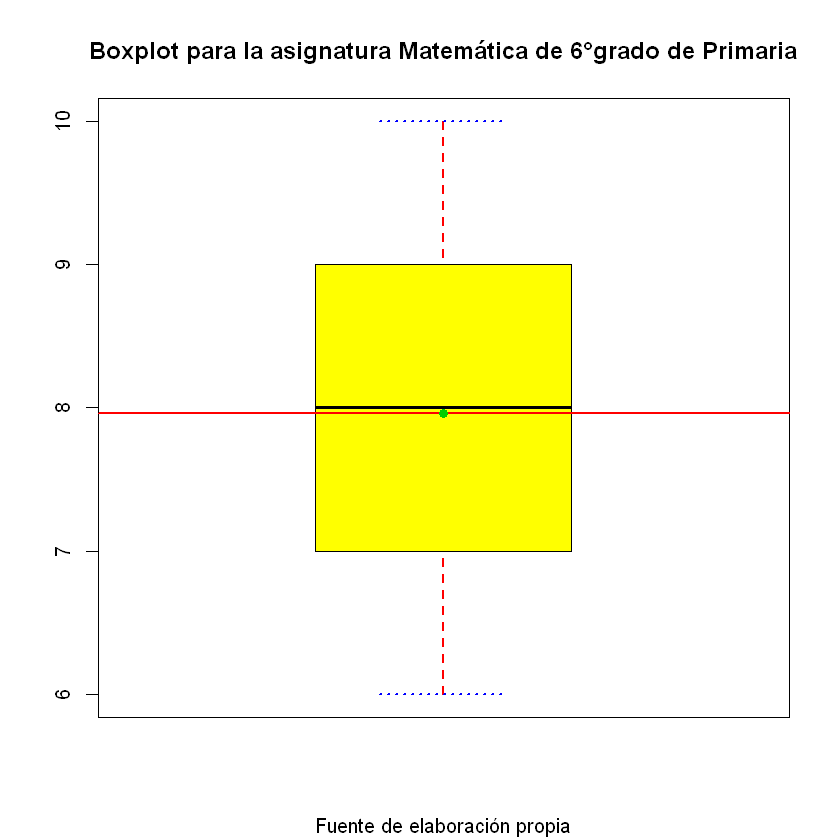

In [73]:
Diamante_mat_6 <- filter(Notas_Diamante_Promedio, Año_cursado== "SEXTO" & asignatura=="MATEMÁTICA")

Notas_mat6_filtrar <- filter(Diamante_mat_6, asignatura=="MATEMÁTICA")

Notas_mat6_filtrar[!is.na(Notas_mat6_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_mat6_filtrar[!is.na(Notas_mat6_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 6°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_mat6_filtrar[!is.na(Notas_mat6_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_mat6_filtrar[!is.na(Notas_mat6_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# -----------------------------------------------------------------------------------------------------------

Promedio,frequency,acumulado
"(6,6.8]",134,134
"(6.8,7.6]",95,229
"(7.6,8.4]",202,431
"(8.4,9.2]",130,561
"(9.2,10]",121,682


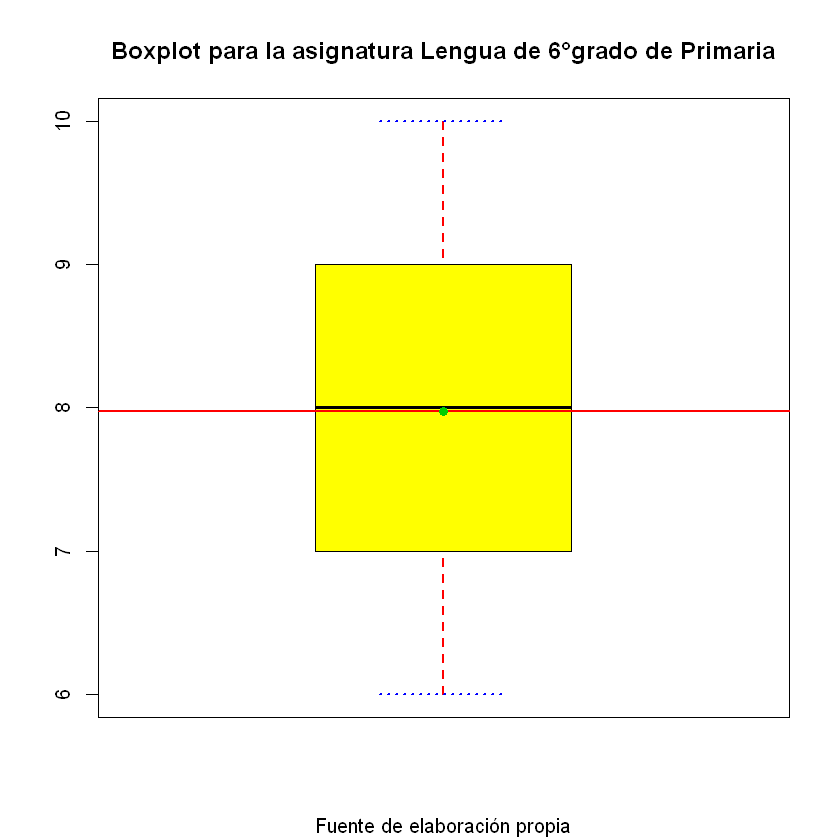

In [74]:
Diamante_len_6 <- filter(Notas_Diamante_Promedio, Año_cursado== "SEXTO" & asignatura=="LENGUA")

Notas_len6_filtrar <- filter(Diamante_len_6, asignatura=="LENGUA")

Notas_len6_filtrar[!is.na(Notas_len6_filtrar$Promedio),] %>% 
  mutate(Promedio = cut(Promedio, breaks = 5), na.rm=TRUE) %>% 
  group_by(Promedio) %>% 
  summarise(frequency = n()) %>% 
  mutate(acumulado = cumsum(frequency))

boxplot(Notas_len6_filtrar[!is.na(Notas_len6_filtrar$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 6°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue",  #Color barras
        col ="yellow") #color caja

# Añadir línea con la media
abline(h = mean(Notas_len6_filtrar[!is.na(Notas_len6_filtrar$Promedio),]$Promedio), col = 2, lwd = 2) # Línea completa

# Añadir punto con la media
points(mean(Notas_len6_filtrar[!is.na(Notas_len6_filtrar$Promedio),]$Promedio), col = 3, pch = 19)

# HISTOGRAMA

# segundo

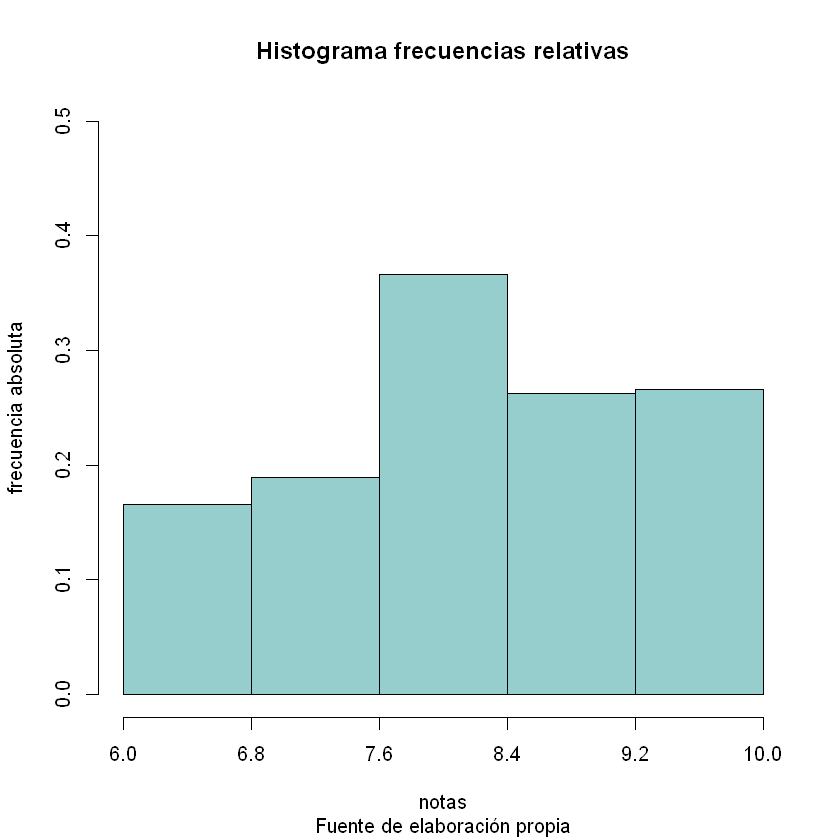

In [63]:
hist(x = Notas_mat2_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# -----------------------------------------------------------------------------------------------------------

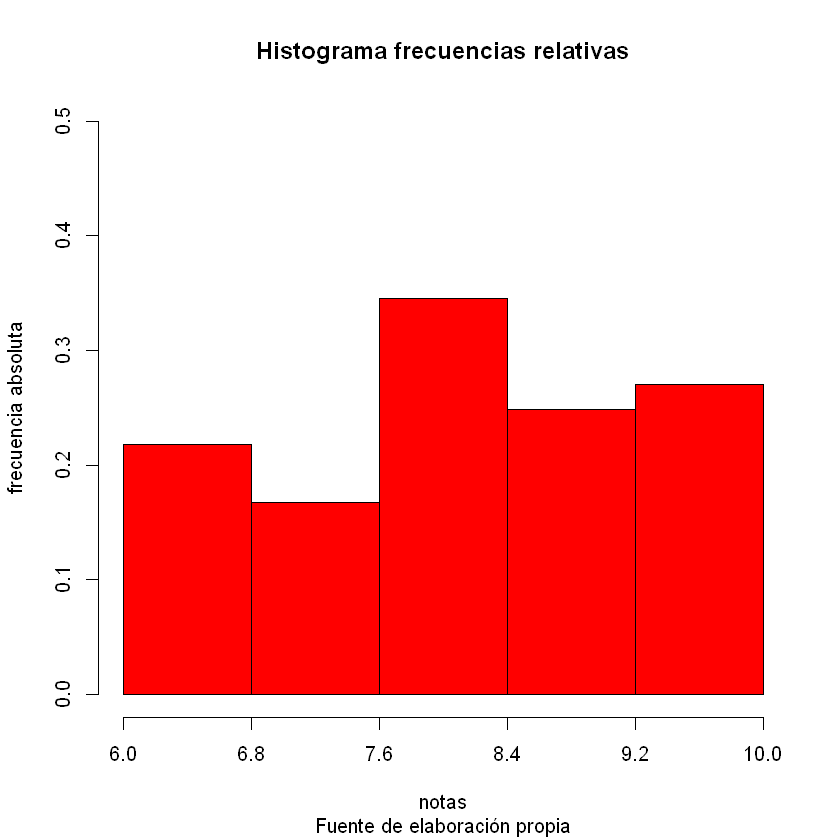

In [64]:
hist(x = Notas_len2_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="red",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# tercero

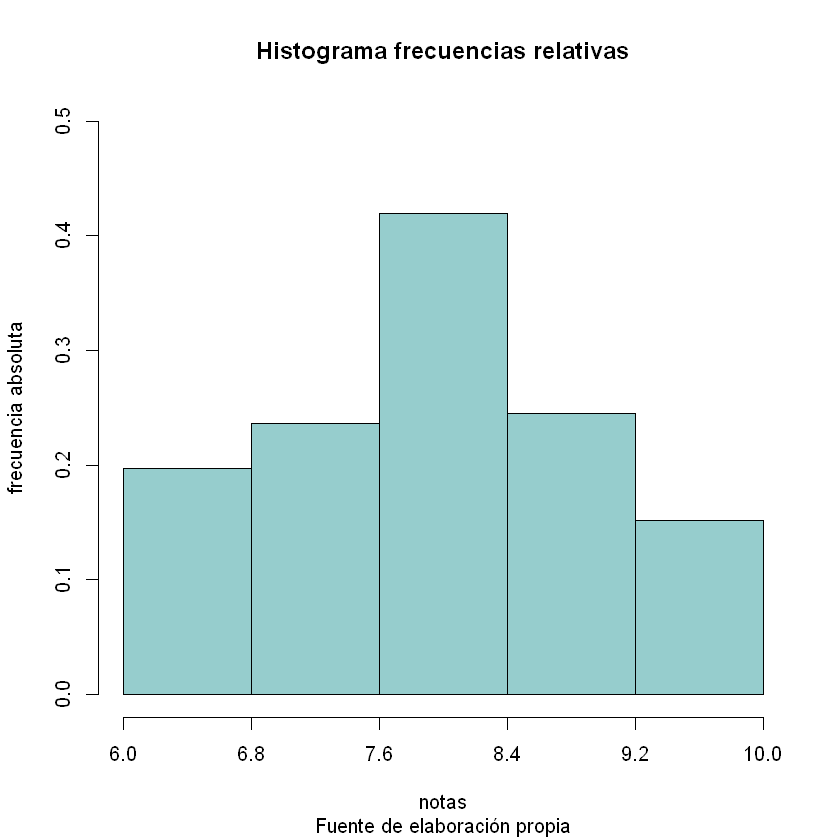

In [65]:
hist(x = Notas_mat3_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# -----------------------------------------------------------------------------------------------------------

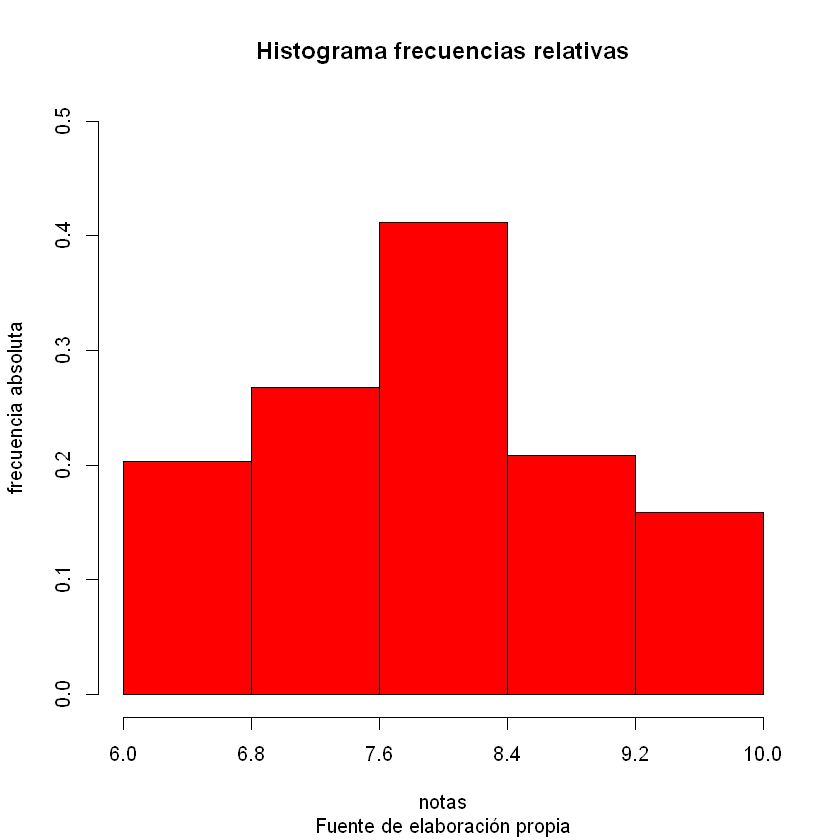

In [66]:
hist(x = Notas_len3_filtrar$Promedio,
     probability = TRUE,
     sub = "Fuente de elaboración propia",
     col="red",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# Cuarto

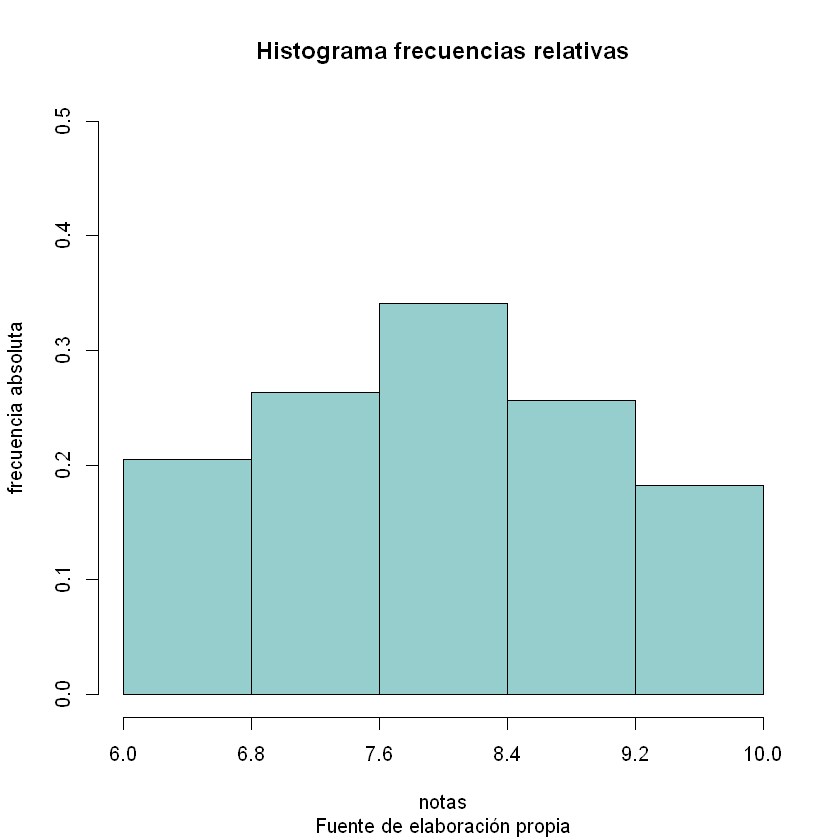

In [67]:
hist(x = Notas_mat4_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# -----------------------------------------------------------------------------------------------------------

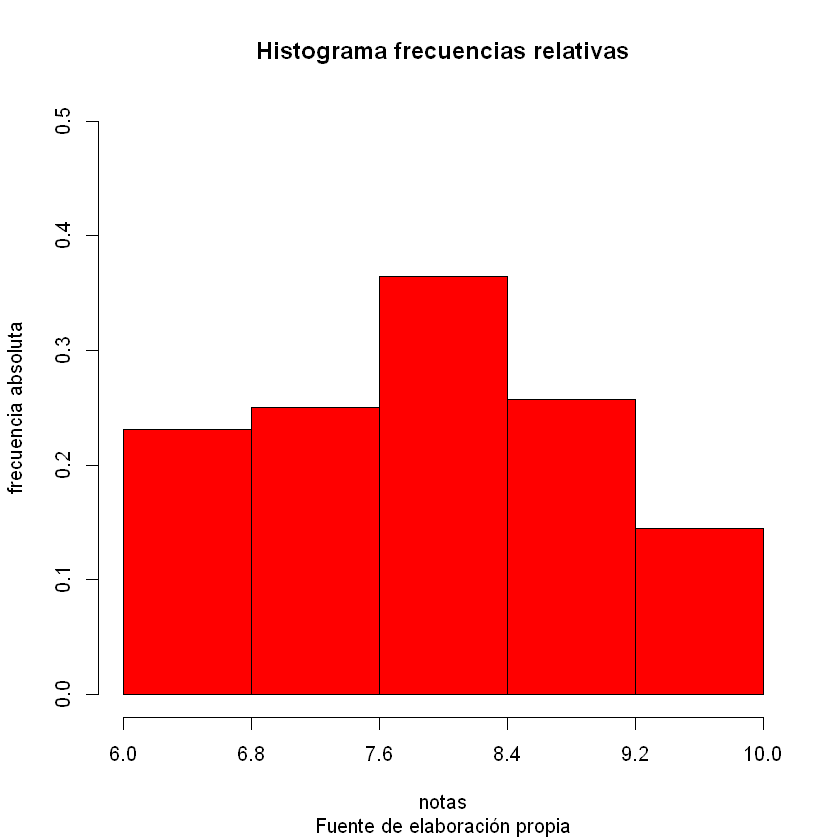

In [68]:
hist(x = Notas_len4_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="red",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# Quinto

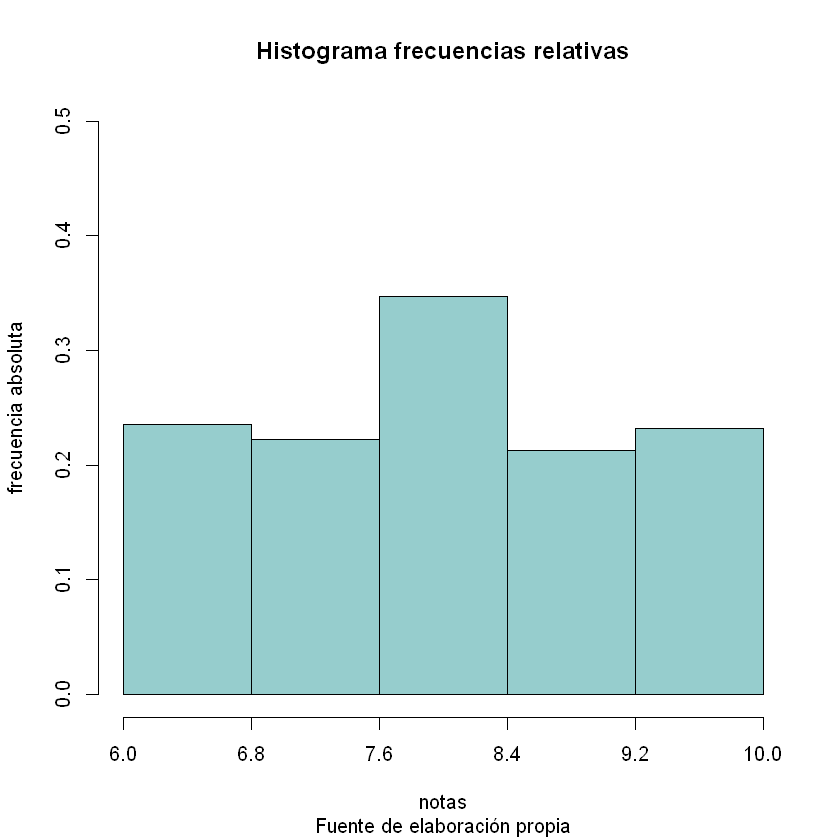

In [70]:
hist(x = Notas_mat5_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# -----------------------------------------------------------------------------------------------------------

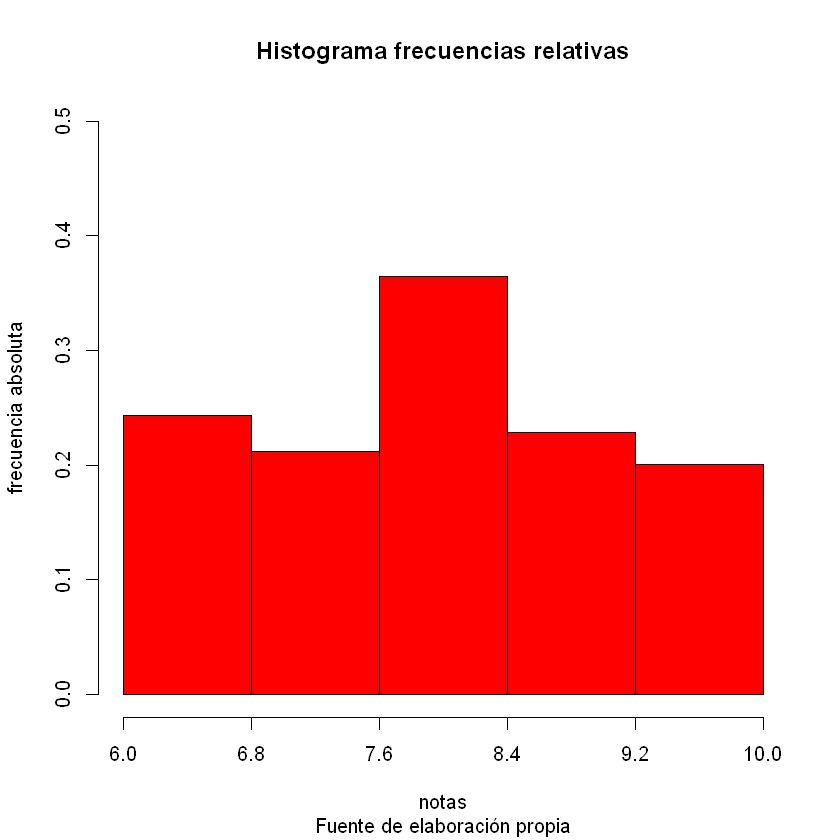

In [71]:
hist(x = Notas_len5_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="red",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# Sexto

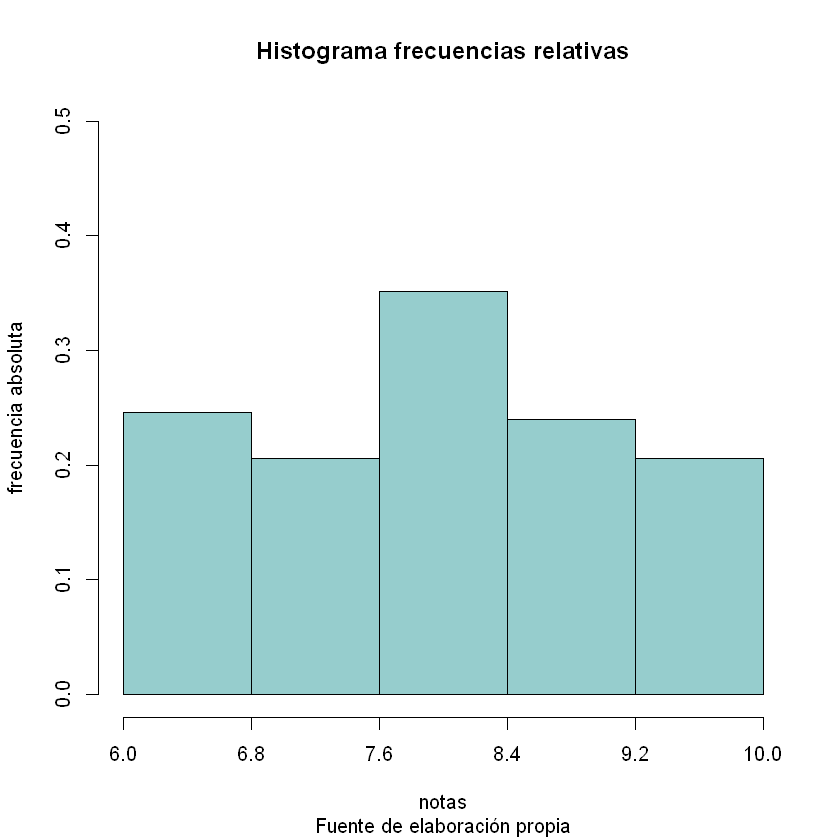

In [75]:
hist(x = Notas_mat6_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="paleturquoise3",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")

# -----------------------------------------------------------------------------------------------------------

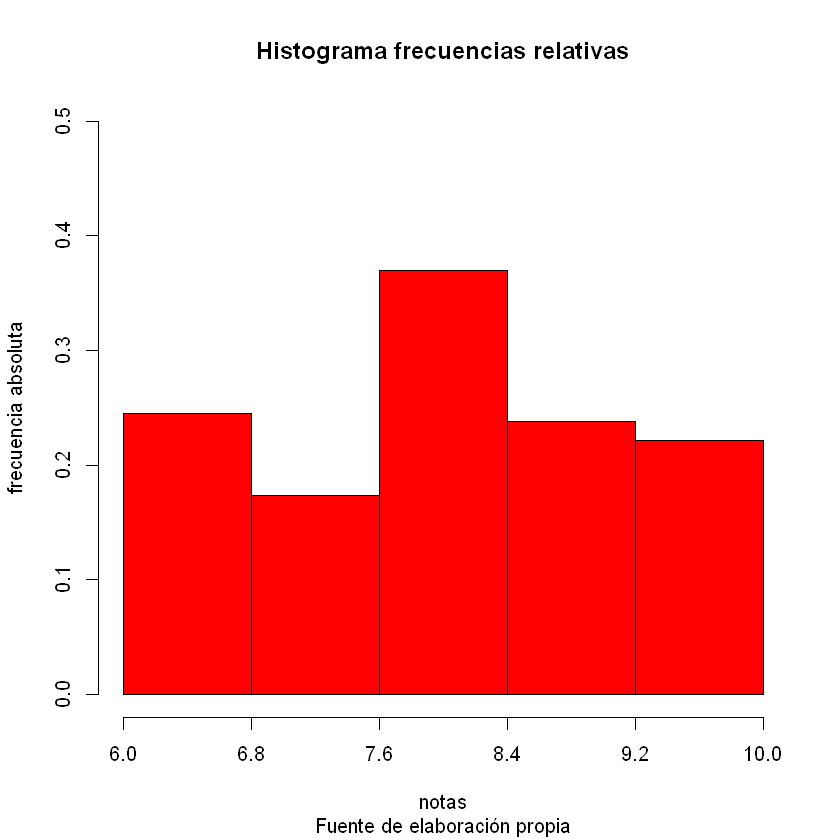

In [76]:
hist(x = Notas_len6_filtrar$Promedio,
     probability = TRUE, 
     sub = "Fuente de elaboración propia",
     col="red",
     breaks = c(6,6.8,7.6,8.4,9.2,10), #cantidad de barras que quiero
     xaxp = c(6, 10, 5), #acomoda el eje x para ver bien los valores
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia absoluta",
     main="Histograma frecuencias relativas")